# Задание 1

In [12]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [5]:
boston = load_boston()
data = boston.data
feature_names = boston.feature_names
X = pd.DataFrame(data, columns=feature_names)
price = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, price, test_size=0.2, random_state=7)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

In [9]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [10]:
X_train_tsne.shape

(404, 2)

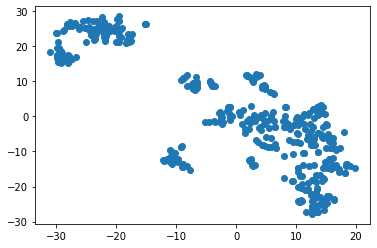

In [11]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:, 1])

# Задание 2

In [16]:
kmeans = KMeans(n_clusters=3, max_iter = 100, random_state = 42)
labels_train = kmeans.fit_predict(X_train_scaled)

In [17]:
pd.value_counts(labels_train)

0    152
1    150
2    102
dtype: int64

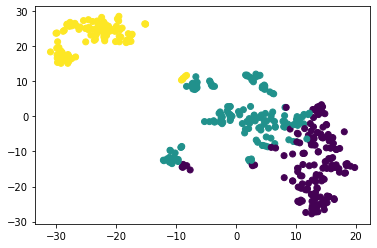

In [18]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

In [28]:
#price mean for 3 clusters
for i in range(3):
    print('price cluster {}: {}'.format(i, y_train[labels_train==i].mean()))
    print('CRIM cluster {}: {}'.format(i, X_train['CRIM'][labels_train==i].mean()))

price cluster 0: 28.053947368421056
CRIM cluster 0: 0.11631190789473682
price cluster 1: 21.648666666666667
CRIM cluster 1: 0.6557896666666662
price cluster 2: 15.564705882352943
CRIM cluster 2: 12.34090088235294


# Задание 3

In [29]:
labels_test = kmeans.predict(X_test_scaled)

In [30]:
for i in range(3):
    print('price cluster {}: {}'.format(i, y_test[labels_test==i].mean()))
    print('CRIM cluster {}: {}'.format(i, X_test['CRIM'][labels_test==i].mean()))

price cluster 0: 27.677777777777777
CRIM cluster 0: 0.12105138888888892
price cluster 1: 21.43225806451613
CRIM cluster 1: 0.7436148387096775
price cluster 2: 18.334285714285716
CRIM cluster 2: 12.177521714285716
